In [1]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [2]:
from functions.data_handling import *
from functions.data_visualization import *
from functions.tf_data import *
from functions.model_saving_loading import *

In [3]:
%store -r RES 
%store -r WIDTH
%store -r HEIGHT
%store -r N_BANDS
%store -r N_CAT
%store -r TRAINING_YEARS 
%store -r TRAINING_SEASONS
%store -r MSK_PATH
%store -r MASK_FILE
%store -r MSK_RAW_PTH 
%store -r MSK_CLIP_PTH 
%store -r MAPPED_MSK_CLIP_PTH 
%store -r MSK_TILES_PTH
%store -r CLN_MSK_TILES_PTH
%store -r IMG_18_PATH 
%store -r IMG_18_FILE 
%store -r IMG_18_COMP_PTH 
%store -r IMG_18_CLIP_PTH 
%store -r IMG_18_NORM_PTH 
%store -r IMG_18_TILES_PTH 
%store -r CLN_IMG_18_TILES_PTH
%store -r IMG_19_PATH
%store -r IMG_19_FILE 
%store -r IMG_19_COMP_PTH
%store -r IMG_19_CLIP_PTH
%store -r IMG_19_NORM_PTH 
%store -r IMG_19_TILES_PTH
%store -r CLN_IMG_19_TILES_PTH 
%store -r MODELS_DIR 
%store -r TRAIN_SPLIT
%store -r TEST_SPLIT
%store -r DATASETS_DIR
%store -r MODELS_TO_LOAD_DIR 
%store -r INFERENCE_INPUT_DIR
%store -r TILE_SIZE
%store -r N_CLASSES
%store -r lgnd

RES = RES
WIDTH = WIDTH
HEIGHT = HEIGHT
N_BANDS = N_BANDS
N_CAT = N_CAT
TRAINING_YEARS = TRAINING_YEARS
TRAINING_SEASONS = TRAINING_SEASONS
MSK_PATH = MSK_PATH
MASK_FILE = MASK_FILE
MSK_RAW_PTH = MSK_RAW_PTH
MSK_CLIP_PTH = MSK_CLIP_PTH
MAPPED_MSK_CLIP_PTH = MAPPED_MSK_CLIP_PTH
MSK_TILES_PTH = MSK_TILES_PTH
CLN_MSK_TILES_PTH = CLN_MSK_TILES_PTH
IMG_18_PATH = IMG_18_PATH
IMG_18_FILE = IMG_18_FILE
IMG_18_COMP_PTH = IMG_18_COMP_PTH
IMG_18_CLIP_PTH = IMG_18_CLIP_PTH
IMG_18_NORM_PTH = IMG_18_NORM_PTH
IMG_18_TILES_PTH = IMG_18_TILES_PTH
CLN_IMG_18_TILES_PTH = CLN_IMG_18_TILES_PTH
IMG_19_PATH = IMG_19_PATH
IMG_19_FILE = IMG_19_FILE
IMG_19_COMP_PTH = IMG_19_COMP_PTH
IMG_19_CLIP_PTH = IMG_19_CLIP_PTH
IMG_19_NORM_PTH = IMG_19_NORM_PTH
IMG_19_TILES_PTH = IMG_19_TILES_PTH
CLN_IMG_19_TILES_PTH = CLN_IMG_19_TILES_PTH
MODELS_DIR = MODELS_DIR
TRAIN_SPLIT = TRAIN_SPLIT
TEST_SPLIT = TEST_SPLIT
DATASETS_DIR = DATASETS_DIR
MODELS_TO_LOAD_DIR = MODELS_TO_LOAD_DIR
INFERENCE_INPUT_DIR = INFERENCE_INPUT_DIR
TILE_SIZE = TILE_SIZE
N_CLASSES = N_CLASSES
lgnd = lgnd
byte_type = bt(RES)

## Datasets preparation

In [4]:
mask_3D_lists = []
image_lists = []

In [5]:
mask_3D_list1 = add_3D(CLN_MSK_TILES_PTH) # adding the 3rd dimension to the cleaned mask tiles. Step needed for the TensorFlow creation
image_list_2018=creating_cln_img_list(CLN_IMG_18_TILES_PTH)
mask_3D_lists.append(mask_3D_list1)
image_lists.append(image_list_2018)

----------------------------------------------
All tiles processed correclty
Length input list: 1437
Length output list: 1437

Third dimension added correctly
Initial shape of elements: (128, 128)
Shape of elements in list: (128, 128, 1)

----------------------------------------------
Length output list: 1437

Image tiles arrays transposed correctly
Initial shape of elements in input list: (10, 128, 128)
Final shape of elements in output list: (128, 128, 10)



In [6]:
# run this cell to include another input dataset
mask_3D_list2 = add_3D(CLN_MSK_TILES_PTH) 
image_list_2019=creating_cln_img_list(CLN_IMG_19_TILES_PTH)
mask_3D_lists.append(mask_3D_list2)
image_lists.append(image_list_2019)

----------------------------------------------
All tiles processed correclty
Length input list: 1437
Length output list: 1437

Third dimension added correctly
Initial shape of elements: (128, 128)
Shape of elements in list: (128, 128, 1)

----------------------------------------------
Length output list: 1437

Image tiles arrays transposed correctly
Initial shape of elements in input list: (10, 128, 128)
Final shape of elements in output list: (128, 128, 10)



In [7]:
mask_list_train, mask_list_val, mask_list_test, image_list_train, image_list_val, image_list_test = dataset_split(image_lists, mask_3D_lists, train_split=TRAIN_SPLIT, test_split=TEST_SPLIT)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


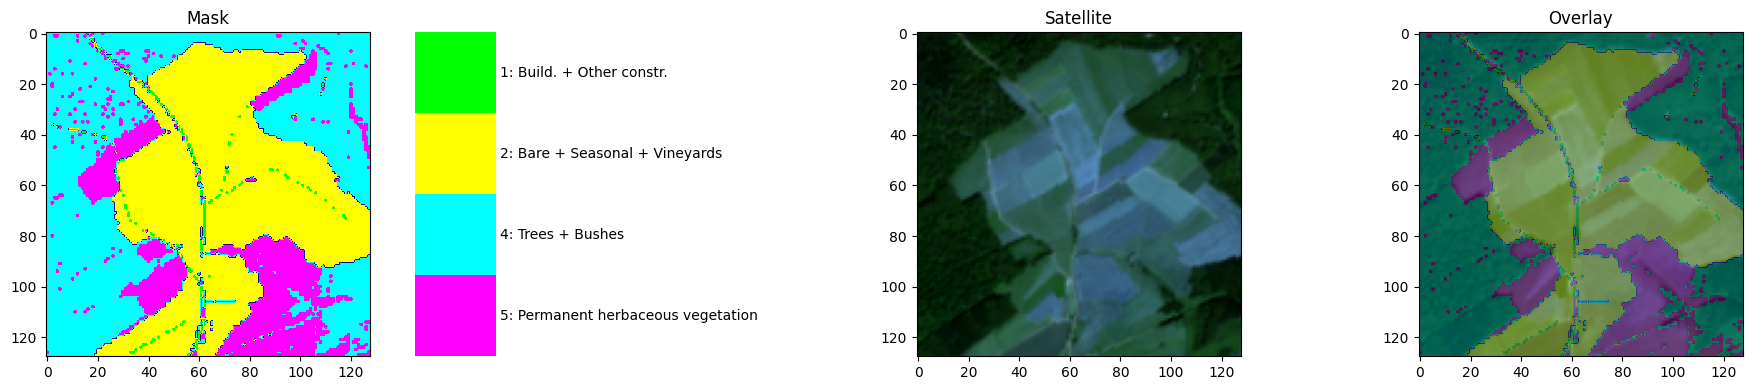

In [8]:
img = image_list_train[0]
mask = mask_list_train[0]
#count_unique_values(mask)

show_mask_overlay(mask, img, lgnd, img_brightness_factor=2.5, season = False, period = 'summer')

#### Optional cell to check that the same tiles from multiple years are included in the training (check needed only if the training in done on multiple years)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


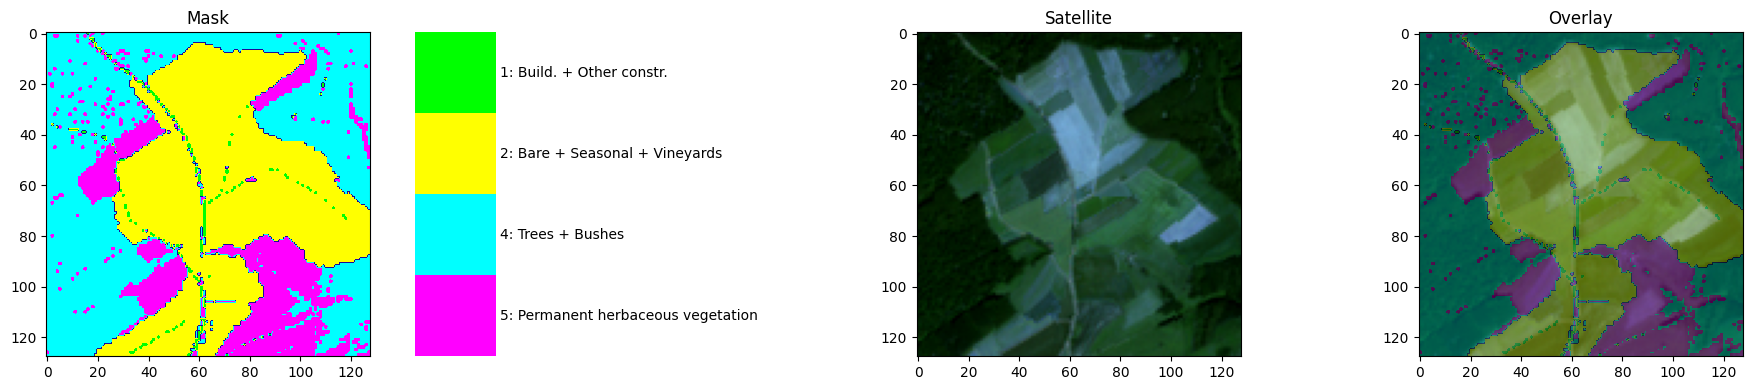

In [9]:
img = image_list_train[int(len(image_list_train)/2)]
mask = mask_list_train[int(len(mask_list_train)/2)]

show_mask_overlay(mask, img, lgnd, img_brightness_factor=2.5, season = False, period = 'summer')

#### Optional cells to check that the same tiles from multiple seasons are processed correctly 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


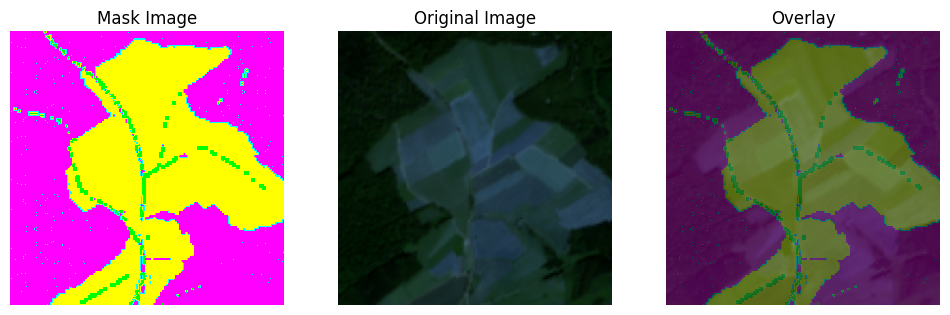

Mask classes: [1 2 4 5]
Mask shape: (128, 128, 1)
Image shape: (128, 128, 10)


In [10]:
compare_arrays(img_arr=image_list_train[0], msk_arr=mask_list_train[0], lgnd=lgnd, season = False, period = 'summer')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


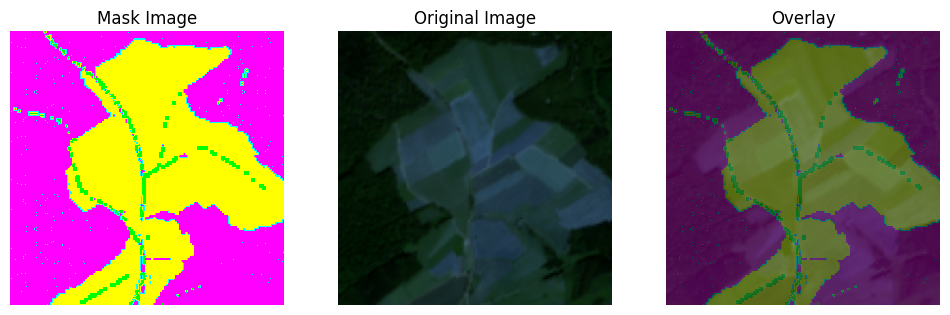

Mask classes: [1 2 4 5]
Mask shape: (128, 128, 1)
Image shape: (128, 128, 10)


In [11]:
compare_arrays(img_arr=image_list_train[0], msk_arr=mask_list_train[0], lgnd=lgnd, season = False, period = 'winter')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


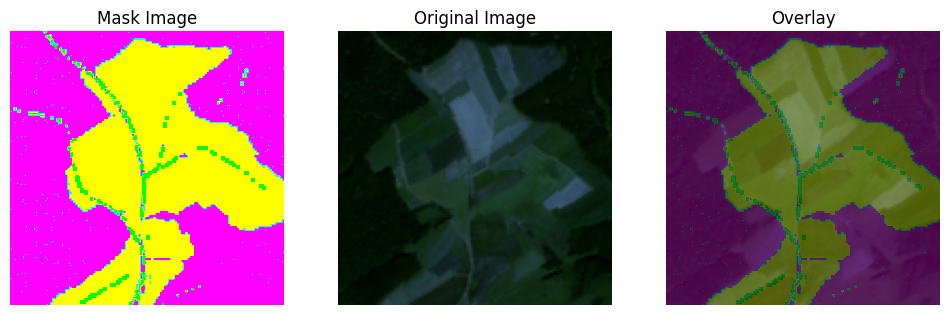

Mask classes: [1 2 4 5]
Mask shape: (128, 128, 1)
Image shape: (128, 128, 10)


In [12]:
compare_arrays(img_arr=image_list_train[int(len(image_list_train)/2)], msk_arr=mask_list_train[int(len(mask_list_train)/2)], lgnd=lgnd, season = False, period = 'winter')

# Creating the Training Dataset

In [13]:
processed_image_ds_train = create_ds(image_list_train, mask_list_train, byte_type)

2023-10-13 18:04:44.972014: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-10-13 18:04:44.972036: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2023-10-13 18:04:44.972042: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2023-10-13 18:04:44.972284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-13 18:04:44.972626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


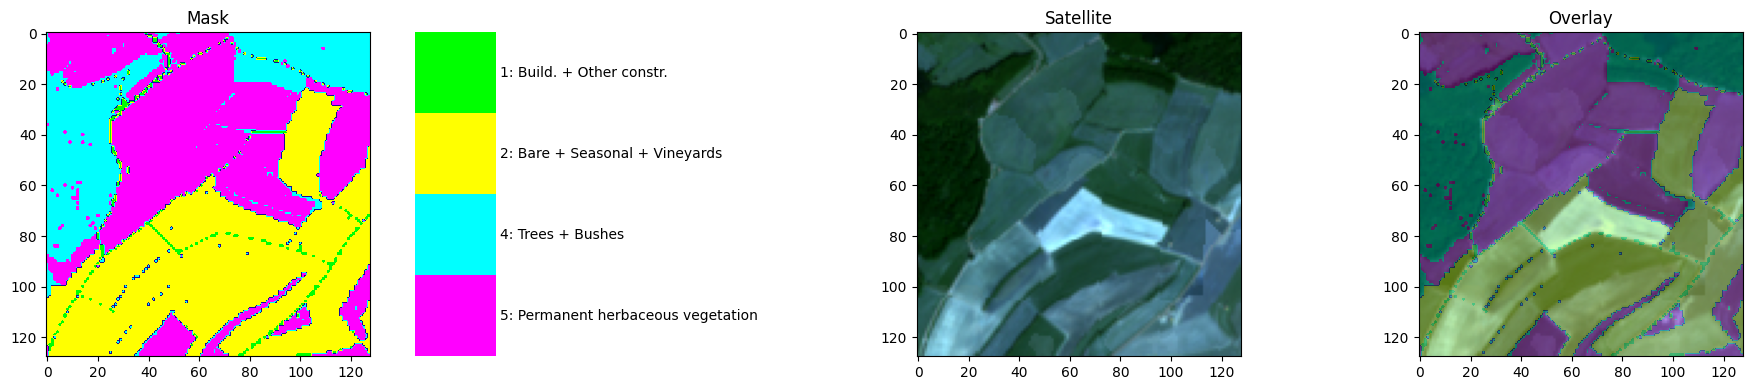

In [14]:
for image, mask in processed_image_ds_train.take(100):
    sample_image, sample_mask = image, mask 
show_mask_overlay(sample_mask, sample_image, lgnd, img_brightness_factor=2.5)  


# Creating the Validation Dataset

In [15]:
processed_image_ds_val = create_ds(image_list_val, mask_list_val, byte_type)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


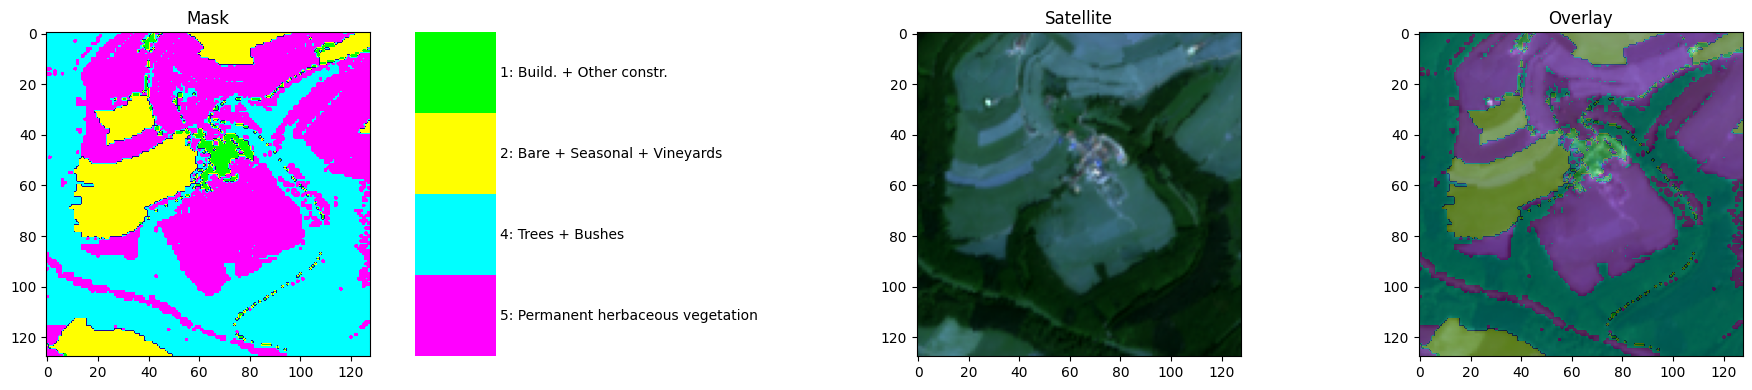

In [16]:
for image, mask in processed_image_ds_val.take(1):
    sample_image, sample_mask = image, mask

show_mask_overlay(sample_mask, sample_image, lgnd, img_brightness_factor=2.5)  

# Creating the Test Dataset

In [17]:
processed_image_ds_test = create_ds(image_list_test, mask_list_test, byte_type)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


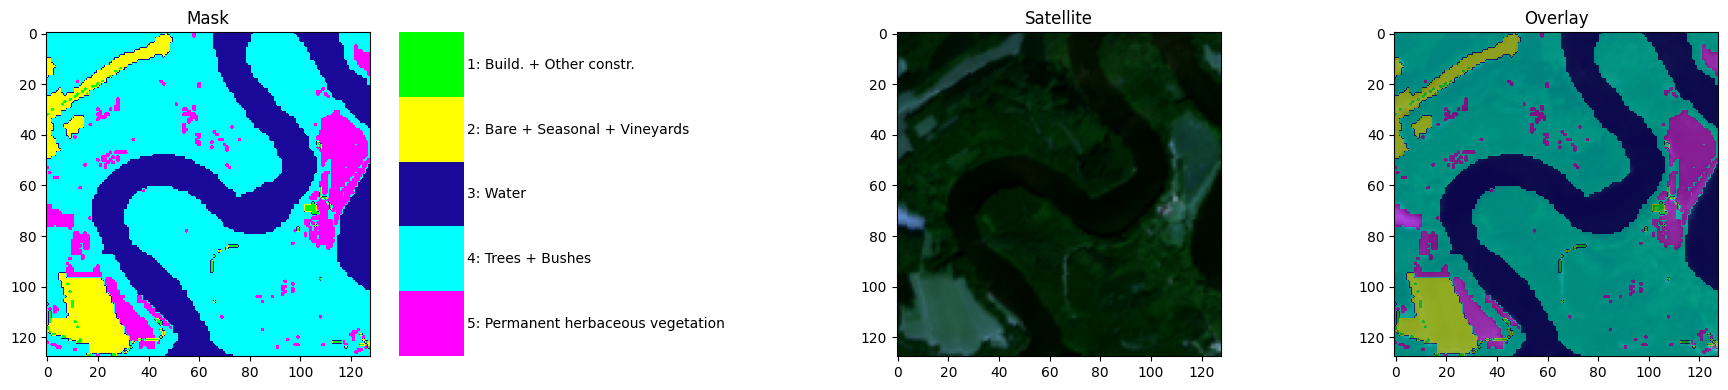

In [18]:
for image, mask in processed_image_ds_test.take(1):
    sample_image, sample_mask = image, mask
show_mask_overlay(sample_mask, sample_image, lgnd, img_brightness_factor=2.5, opacity=0.5)  

In [19]:
delete_directory_or_file(DATASETS_DIR)

tf.data.Dataset.save(processed_image_ds_train, f'{DATASETS_DIR}/processed_image_ds_train')
tf.data.Dataset.save(processed_image_ds_val, f'{DATASETS_DIR}/processed_image_ds_val')
tf.data.Dataset.save(processed_image_ds_test, f'{DATASETS_DIR}/processed_image_ds_test')

Deleted directory and its contents: segmentation/lulc/tf_records_5_cat_eb/Y18_19-128px-28_09_2023-18h_15m/


In [20]:
print(len(processed_image_ds_train))
print(len(processed_image_ds_val))
print(len(processed_image_ds_test))

2586
230
58
